In [2]:
import pandas as pd
import numpy as np
from keras.layers import Dense,LSTM, Embedding
from keras.models import Model, Sequential


In [3]:
df = pd.read_csv('/home/noah/Datasets/Presidential Debate/debate1.csv')

In [4]:
df

,speaker,minute,text
0,Chris Wallace,01:20,Good evening from the Health Education Campus ...
1,Chris Wallace,02:10,This debate is being conducted under health an...
2,Vice President Joe Biden,02:49,"How you doing, man?"
3,President Donald J. Trump,02:51,How are you doing?
4,Vice President Joe Biden,02:51,I’m well.
...,...,...,...
784,Chris Wallace,01:10:43,"Gentlemen, just say that’s the end of it [cros..."
785,President Donald J. Trump,01:10:47,I want to see an honest ballot count.
786,Chris Wallace,01:10:48,We’re going to leave it there-
787,President Donald J. Trump,01:10:49,And I think he does too-


In [5]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
vocab = 10000
tok = Tokenizer(num_words = 10000)
textArr = df['text']
tok.fit_on_texts(textArr)
sequences = tok.texts_to_sequences(textArr)
print("max length of sequence: ", max(len(sequence) for sequence in sequences))

max length of sequence:  199


(array([ 82., 115., 101.,  90.,  69.,  33.,  31.,  28.,  22.,  16.,  11.,
         12.,   8.,   3.,   3.,  13.,   4.,   5.,   6.,   4.,   6.,   4.,
          4.,   4.,   1.,   2.,   5.,   0.,   4.,   2.,   3.,   3.,   4.,
          2.,   1.,   3.,   5.,   2.,   2.,   3.,   6.,   1.,   1.,   2.,
          4.,   1.,   5.,   0.,   2.,   2.,   1.,   3.,   2.,   0.,   0.,
          2.,   4.,   1.,   1.,   1.,   1.,   1.,   2.,   2.,   2.,   2.,
          3.,   1.,   2.,   0.,   0.,   0.,   0.,   1.,   1.,   1.,   1.,
          1.,   1.,   2.,   1.,   0.,   0.,   1.,   0.,   1.,   0.,   1.,
          0.,   0.,   1.,   0.,   0.,   0.,   1.,   1.,   1.,   1.,   0.,
          1.]),
 array([  1.  ,   2.98,   4.96,   6.94,   8.92,  10.9 ,  12.88,  14.86,
         16.84,  18.82,  20.8 ,  22.78,  24.76,  26.74,  28.72,  30.7 ,
         32.68,  34.66,  36.64,  38.62,  40.6 ,  42.58,  44.56,  46.54,
         48.52,  50.5 ,  52.48,  54.46,  56.44,  58.42,  60.4 ,  62.38,
         64.36,  66.34,  68.32

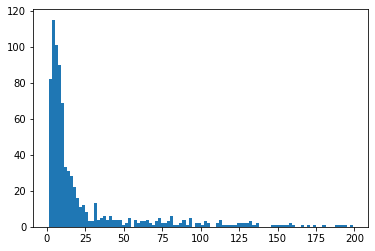

In [6]:
import matplotlib.pyplot as plt
numberOfWords = [len(sequence) for sequence in sequences]

plt.hist(numberOfWords, bins = 100)


In [7]:
for i in [5,6,7,8,9,10]:
    print("Number of samples with number of words greater than ", i, ":", len([len(sequence) for sequence in sequences if len(sequence)>i]))

Number of samples with number of words greater than  5 : 540
Number of samples with number of words greater than  6 : 491
Number of samples with number of words greater than  7 : 437
Number of samples with number of words greater than  8 : 401
Number of samples with number of words greater than  9 : 362
Number of samples with number of words greater than  10 : 332


In [8]:
nGreater = 8
indices = [i for i in range(len(sequences)) if len(sequences[i])>nGreater]
sequences = np.asarray(sequences)[indices]
sequences

array([list([110, 1242, 102, 1, 254, 867, 1243, 6, 290, 868, 656, 657, 4, 1, 658, 659, 39, 214, 1244, 6, 1245, 660, 4, 10, 869, 3, 2, 1, 116, 6, 1, 1246, 467, 355, 416, 16, 870, 1247, 103, 4, 661, 66, 16, 108, 117, 21, 291, 11, 871, 32, 1, 417, 25, 467, 355, 1, 417, 64, 872, 1, 1248, 662, 873, 292, 197, 874, 33, 67, 197, 875, 102, 356, 1249, 2, 1, 116, 77, 187, 123, 418, 31, 1, 876, 6, 356, 188, 179, 877, 12, 242, 2, 131, 1250, 31, 1, 264, 10, 663, 1, 1251, 4, 1, 549, 7, 356, 1252, 10, 81, 1253, 3, 357, 6, 1, 549, 64, 83, 1254, 33, 1, 417, 111, 1, 67, 664]),
       list([21, 291, 11, 159, 1255, 255, 254, 4, 665, 1256, 872, 32, 1, 658, 659, 119, 11, 1257, 44, 1, 254, 878, 1258, 2, 1, 417, 31, 30, 215, 355, 44, 5, 1259, 179, 877, 12, 242, 1, 664, 55, 19, 1260, 666, 43, 1, 667, 6, 1261, 291, 1, 1262, 189, 7, 1, 1263, 64, 879, 2, 1264, 1265, 34, 1266, 34, 1267, 111, 168, 880, 40, 14, 4, 68, 881, 3, 81, 882, 25, 20, 1, 664, 12, 2, 56, 34, 1268, 883, 75, 69, 44, 14, 869, 1, 468, 419, 16, 103

In [9]:
sequences = pad_sequences(sequences, maxlen = 199)

In [10]:
sequences.shape

(401, 199)

In [11]:
from keras.utils import to_categorical
targets = df['speaker'].to_numpy()[indices]
targetDict = {}
people = np.unique(targets)
for i in range(len(people)):
    targetDict[people[i]] = i

print("target dictionary:", targetDict)
targets = [targetDict[person] for person in targets]
targets = to_categorical(targets)
targets

target dictionary: {'Chris Wallace': 0, 'Chris Wallace:': 1, 'President Donald J. Trump': 2, 'Vice President Joe Biden': 3}


array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [14]:
model = Sequential()
model.add(Embedding(vocab, 32, input_length = 199))
model.add(LSTM(64, dropout = 0.2, recurrent_dropout = 0.2, return_sequences = True))
model.add(LSTM(64, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(4, activation = 'softmax'))
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(sequences,targets, validation_split = 0.1, epochs = 30)

Epoch 1/30
12/12 [==============================] - 3s 291ms/step - loss: 1.2244 - accuracy: 0.3972 - val_loss: 1.1568 - val_accuracy: 0.3415
Epoch 2/30
12/12 [==============================] - 3s 246ms/step - loss: 1.1094 - accuracy: 0.4167 - val_loss: 1.1653 - val_accuracy: 0.3415
Epoch 3/30
12/12 [==============================] - 3s 240ms/step - loss: 1.1027 - accuracy: 0.4306 - val_loss: 1.1563 - val_accuracy: 0.3415
Epoch 4/30
12/12 [==============================] - 3s 243ms/step - loss: 1.0832 - accuracy: 0.4444 - val_loss: 1.1580 - val_accuracy: 0.3415
Epoch 5/30
12/12 [==============================] - 3s 243ms/step - loss: 1.0828 - accuracy: 0.4389 - val_loss: 1.0741 - val_accuracy: 0.3415
Epoch 6/30
12/12 [==============================] - 3s 241ms/step - loss: 1.0383 - accuracy: 0.5056 - val_loss: 1.1025 - val_accuracy: 0.3415
Epoch 7/30
12/12 [==============================] - 3s 242ms/step - loss: 0.9426 - accuracy: 0.5333 - val_loss: 1.0364 - val_accuracy: 0.5122
Epoch 